# VT1

This is the Script for the VT1 which shall fullfill the following tasks:
- Create Scenarios with given Inputs
- Calculate the Net Present Value for a given Capacity Vector
- Apply a Decision Rule to the Scenarios and calculate a Flexible Capacity Vector
- Calculate the Net Present value for the Flexible Capacity Vector
- Export all the Data to an Excel Sheet

Optional:
- Optimize the Runtime


## Import of Packages

In [1]:
# Import of Packages
import numpy as np
import pandas as pd
import time

# Importing the Functions File
import Functions as fn

# Start of Timer to Measure Runtime
start_time = time.time()

# Import of Excel Data
(General Format of Excel must be Headers followed by columns of Data)

In [2]:
# Reading the Excel File as a Dataframe
df = pd.read_excel("Sample.xlsx")

## Creating Scenarios based on Historic Data
Calculation of Driftrate Mu and Standart Deviation Sigma with Historic Data


In [3]:
# Assign Variables with a Specific Vectors of the Dataframe
Year = np.array(df.iloc[:, 0])
Historic_Demand = np.array(df.iloc[:, 1])
Annual_Change = np.array(df.iloc[:, 2])
Percentage_Change = np.array(df.iloc[:, 3])
Outliner = np.array(df.iloc[:, 4])
# Percentage Change Excluding the Outliners
Percentage_Change1 = np.array(df.iloc[:, 5])

# Caluclation of the Estimated Percentage Drift Rate Mu:
mu = np.nanmean(Percentage_Change1)
print("Mu = ", mu)
# Caluclation of the Estimated Percentage Standart Deviation Sigma:
sigma = np.nanstd(Percentage_Change1)
print("Simga = ", sigma)

Mu =  0.042754330256447565
Simga =  0.05813761525452841


### (Inputs) Definition for Scenarios 

In [4]:
# Demand at t0
Dt0 = Historic_Demand[-1]
# Steptime in Years
dt = 1
# Time Horizon of Forecasts in Steptime
Fth = 20
# Number of Forecasts
Forecasts = 100000

Creating a Defined Number of Forecasts and Plotting them

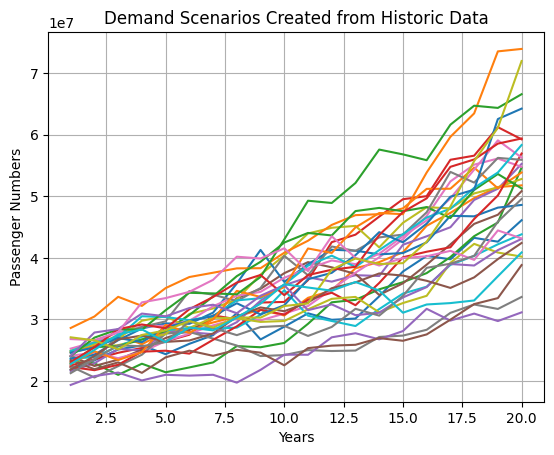

<Figure size 640x480 with 0 Axes>

In [5]:
# Calling the Scenario Creation Function
Scenario = fn.Scenario_creation(mu, sigma, Dt0, dt, Fth, Forecasts)
# Calling the Scenario Plotting Function
fn.Scenario_plot(
    Scenario,
    Fth,
    True,
    "Demand Scenarios Created from Historic Data",
    "Passenger Numbers",
    30,
)

# Assinging the Scenario as Demand
D = Scenario
# Rounding the Demand in Millions for further Calculations
D_rounded = np.ceil(D / 1000000)

## Exporting Scenario Data
(Mainly used for Programming and Cross Checking with Excel)

In [6]:
# # Add Initial Value for the Export
# df_export = np.hstack((Dt0 * np.ones((D.shape[0], 1)), D))
# # Change the Type to a Pandas Dataframe
# df_export_2 = pd.DataFrame(df_export)
# # Define Export File Name (If Excel is not found in Folder a new  File is Created)
# excel_file = "output.xlsx"
# # Fill the Dataframe into the Excel File
# df_export_2.to_excel(excel_file, index=False)

## Calculation of the Traditional NPV and ENPV

### (Inputs) NPV Calculation Definiton (These are set as Standart Inputs in Functions)

In [7]:
th = 1000000  # Throughput Capacity per Unit of Capacity
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
r_K_rent = 0.03  # Rental Revenues per Unit of Capacity per Period
co_K = 0.01  # Operational costs per unit of capacity per period
co_D = 0.004  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor

### (Input) Definition of a Capacity Vector

In [8]:
# Definition of a Capacity Vector
K_rounded = np.array(
    [25, 25, 25, 25, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50]
)

# Checking the Length of the Capacity Vector
fn.Capacity_Vector_Check(K_rounded, D_rounded)

Capacity Vector Matches the Demand Array Shape


In [9]:
# Calling the NPV Calculation Function
Traditional_NPV = fn.NPV_Calculation(
    D_rounded,
    K_rounded,
    Fth,
    dt,
    th,
    r_D,
    r_K,
    r_K_rent,
    co_K,
    co_D,
    ci_K,
    discount,
    EoS,
)
print("Traditional NPVs = ", Traditional_NPV)
# Calculating the Traditonal ENPV for the given Capacity Vector
Traditional_ENPV = np.mean(Traditional_NPV)
print("\nTraditional ENPV = ", Traditional_ENPV)

Traditional NPVs =  [ 5610808.89577495  8914132.79647489  9123583.84051729 ...
  7472331.99651489 10258125.82694903 11628353.68604066]

Traditional ENPV =  9992790.443763785


## Creating a Flexible Capacity Vector

In [10]:
# Initial Capacity
K0 = K_rounded[0]
# Capacity Increase in the Excel Sheet
theta_excel = 5
# Calling the Decision Rule for Excel Function to Create a Flexible Capacity Vector
Flexible_Capacity_Excel = fn.Decision_Rule_Excel(D_rounded, K0, theta_excel)

### (Input) Parameters for Decision Rule

In [11]:
# Capacity Theta Vector for Increase of Capacity [4 Integers]
theta_flex = [1, 4, 6, 8]
# Capacity Difference Vector for Comparison  of Capacity [3 Integers]
deltaK = [2, 4, 6]

# Calling the Decision Rule Function to Create a Flexible Capacity Vector
Flexible_Capacity = fn.Decision_Rule(D_rounded, K0, theta_flex, deltaK)

Theta and deltaK match the requirements


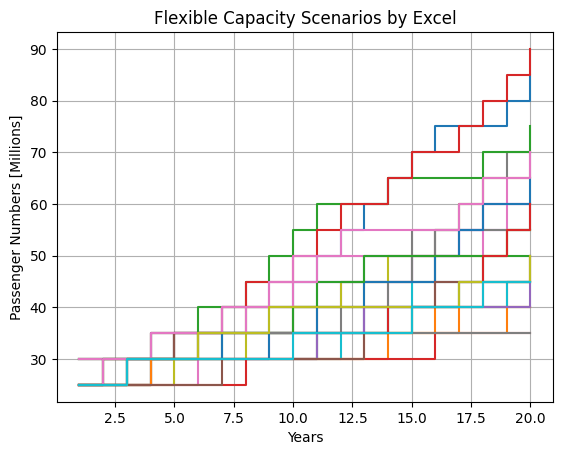

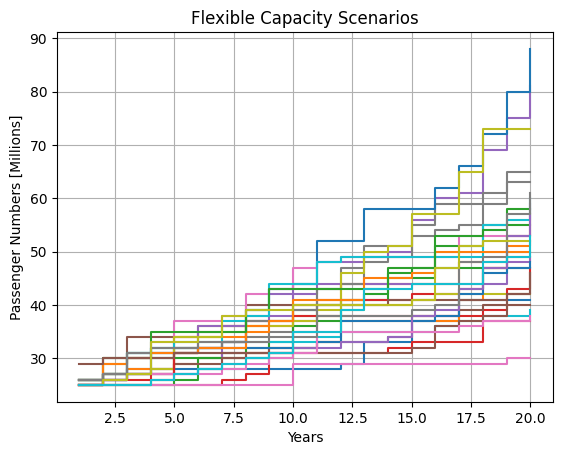

<Figure size 640x480 with 0 Axes>

In [12]:
# Plotting the Flexible Capacity Vectors
fn.Scenario_plot(
    Flexible_Capacity_Excel,
    Fth,
    False,
    "Flexible Capacity Scenarios by Excel",
    "Passenger Numbers [Millions]",
    30,
)

fn.Scenario_plot(
    Flexible_Capacity,
    Fth,
    False,
    "Flexible Capacity Scenarios",
    "Passenger Numbers [Millions]",
    30,
)

## Calculation of NPV and ENPV using the Flexible Capacity Vector

In [13]:
Flex_NPV_excel = fn.NPV_Calculation(
    D_rounded,
    Flexible_Capacity_Excel,
    Fth,
    dt,
    th,
    r_D,
    r_K,
    r_K_rent,
    co_K,
    co_D,
    ci_K,
    discount,
    EoS,
)
print("Flexible Excel NPVs = ", Flex_NPV_excel)
# Calculating the ENPV for the Flexible Excel Capacity Vector
Flex_ENPV_excel = np.average(Flex_NPV_excel)
print("\nFlexible Excel ENPV = ", Flex_ENPV_excel)

Flexible Excel NPVs =  [ 7504644.28275032  9356345.04361844  9613728.88925005 ...
  8658804.08936313 10318097.87972406 11030379.41021463]

Flexible Excel ENPV =  10204102.395664627


In [14]:
# Calling the Flexible NPV Calculation Function
Flex_NPV_est = fn.NPV_Calculation(
    D_rounded,
    Flexible_Capacity,
    Fth,
    dt,
    th,
    r_D,
    r_K,
    r_K_rent,
    co_K,
    co_D,
    ci_K,
    discount,
    EoS,
)
print("Estimated Flexible Excel NPVs = ", Flex_NPV_est)
# Calculating the ENPV for the Estimated Flexible Capacity Vector
Flex_ENPV_est = np.average(Flex_NPV_est)
print("\nEstimated Flexible ENPV = ", Flex_ENPV_est)

Estimated Flexible Excel NPVs =  [ 7903423.01612133  9789095.89137381 10003058.16928113 ...
  8935122.86990999 10532746.13737994 11484984.77173478]

Estimated Flexible ENPV =  10508634.282141455


## Plotting Target (CDF) Curves
Cumulative Density Function

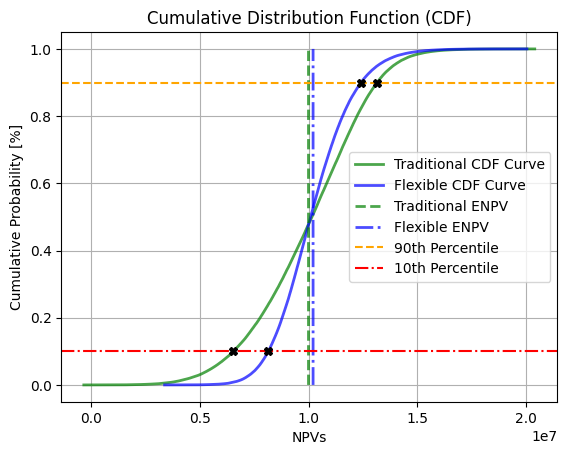

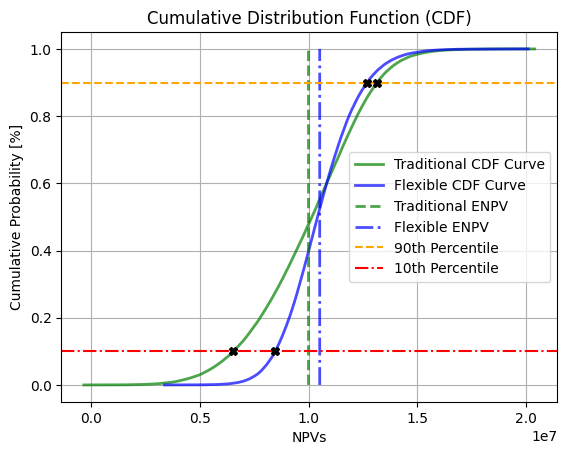

Percentiles (10 and 90) for Traditional + Flexible NPVs = [6533776.177118376, 13143632.015092371, 8146203.657917907, 12407379.401073085]
Percentiles (10 and 90) for Traditional + Flexible Excel NPVs = [6533776.177118376, 13143632.015092371, 8459815.633147435, 12685499.509363651]


In [15]:
# Plotting the CDF for the First Decision Rule
Percentiles = fn.CDF_Plot(Traditional_NPV, Flex_NPV_excel)

# Plotting the CDF for the Second Decision Rule
Percentiles1 = fn.CDF_Plot(Traditional_NPV, Flex_NPV_est)
print("Percentiles (10 and 90) for Traditional + Flexible NPVs =", Percentiles)
print("Percentiles (10 and 90) for Traditional + Flexible Excel NPVs =", Percentiles1)

## Exporting Calculated Data

In [16]:
# # Create a Dictionary
# Exportdata = {
#     "Traditional NPV": Traditional_NPV,
#     "Flexible NPV": Traditional_NPV,
#     "Flexible NPV Excel": Flex_NPV_excel,
#     "Traditional ENPV": Traditional_ENPV,
#     "Flexible ENPV": Flex_ENPV_est,
#     "Flexible ENPV Excel": Flex_ENPV_excel,
# }
# # Create a Pandas Dataframe
# df = pd.DataFrame(Exportdata)

# # Export the Pandas DataFrame to an Excel File
# df.to_excel("NPV_Export.xlsx", index=False)

### Stopping the Runtime

In [17]:
end_time = time.time()

# Calculate the Total Runtime
total_run_time = end_time - start_time

# Display the Total Runtime
print("Total Runtime =", total_run_time)

Total Runtime = 6.817450046539307
